In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import os
import urllib 
import requests
import urllib.request
from tempfile import NamedTemporaryFile

In [31]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/rfordatascience/' \
    'tidytuesday/master/data/2020/2020-10-06/tournament.csv'
)

In [32]:
df

,year,school,seed,conference,conf_w,conf_l,conf_percent,conf_place,reg_w,reg_l,reg_percent,how_qual,x1st_game_at_home,tourney_w,tourney_l,tourney_finish,full_w,full_l,full_percent
0,1982,Arizona St.,4.0,Western Collegiate,NaN,NaN,NaN,-,23,6,79.3,at-large,Y,1,1,RSF,24,7,77.4
1,1982,Auburn,7.0,Southeastern,NaN,NaN,NaN,-,24,4,85.7,at-large,N,0,1,1st,24,5,82.8
2,1982,Cheyney,2.0,Independent,NaN,NaN,NaN,-,24,2,92.3,at-large,Y,4,1,N2nd,28,3,90.3
3,1982,Clemson,5.0,Atlantic Coast,6.0,3.0,66.7,4th,20,11,64.5,at-large,N,0,1,1st,20,12,62.5
4,1982,Drake,4.0,Missouri Valley,NaN,NaN,NaN,-,26,6,81.3,auto,Y,2,1,RF,28,7,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2087,2018,UCLA,3.0,Pac-12,14.0,4.0,77.8,3rd,24,8,75.0,at-large,Y,2,1,RF,27,8,77.1
2088,2018,UConn,1.0,American Athletic,16.0,0.0,100.0,1st,32,0,100.0,auto,Y,4,1,NSF,36,1,97.3
2089,2018,Villanova,9.0,Big East,12.0,6.0,66.7,3rd,22,8,73.3,at-large,N,1,1,2nd,23,9,71.9
2090,2018,Virginia,10.0,Atlantic Coast,10.0,6.0,62.5,6th,10,6,62.5,at-large,N,1,1,2nd,19,14,57.6


In [33]:
finishes = (df
            .groupby('school')
            .tourney_finish
            .value_counts()
            .to_frame()
            .rename(columns={'tourney_finish':'count'})
            .reset_index()
            #.xs('UConn', level='school')
            )

In [34]:
finishes = (pd
 .pivot_table(finishes, index='school', columns='tourney_finish', values='count')
 .reindex(columns=['1st', '2nd', 'RSF', 'RF','NSF','N2nd','Champ'])
 .rename(columns={'RSF':'S16','RF':'E8','NSF':'F4','N2nd':'R.Up'})
 .fillna(0)
 )

finishes = finishes[list(finishes.columns)].astype(int)

In [35]:
finishes.sort_values(by='Champ',ascending=False)

tourney_finish,1st,2nd,S16,E8,F4,R.Up,Champ
school,,,,,,,
UConn,2,2,2,5,8,0,11
Tennessee,1,2,6,10,5,5,8
Stanford,3,4,6,6,9,2,2
Louisiana Tech,7,0,4,6,4,4,2
Notre Dame,4,5,7,1,2,4,2
...,...,...,...,...,...,...,...
Jackson St.,3,0,0,0,0,0,0
Jacksonville,1,0,0,0,0,0,0
James Madison,6,2,4,0,0,0,0


In [36]:
def cmap_discretize(cmap, N):
  if type(cmap) == str:
      cmap = plt.get_cmap(cmap)
  colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
  colors_rgba = cmap(colors_i)
  indices = np.linspace(0, 1., N+1)
  cdict = {}
  for ki,key in enumerate(('red','green','blue')):
      cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in range(N+1) ]
  # Return colormap object.
  return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

def colorbar_index(ncolors, cmap, data):
  cmap = cmap_discretize(cmap, ncolors)
  mappable = matplotlib.cm.ScalarMappable(cmap=cmap)
  mappable.set_array([])
  mappable.set_clim(-0.5, ncolors+0.5)
  colorbar = plt.colorbar(mappable)
  colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
  colorbar.set_ticklabels(np.unique(data))
  colorbar.set_label("Number of Games Where a Team's Tournament Ended",rotation=270,fontproperties=prop2,fontsize=22)
  colorbar.ax.get_yaxis().labelpad = 25
  # colorbar.ax.tick_params(fontproperties=prop)
  # colorbar.set_font_properties(prop)
  for label in colorbar.ax.get_yticklabels():
    label.set_fontproperties(prop)

In [ ]:
# paths = [x for x in os.listdir() if x.endswith('.png')]
# [os.remove(i) for i in os.listdir() if i.endswith('.png')]
paths = [f'{i}.png' for i in list(viz.index)]

In [42]:
github_url = 'https://github.com/google/fonts/blob/main/ofl/firamono/FiraMono-Regular.ttf'

url = github_url + '?raw=true'

response = urllib.request.urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()

prop = fm.FontProperties(fname=f.name)

In [43]:
github_url = 'https://github.com/google/fonts/blob/main/ofl/lato/Lato-Regular.ttf'

url = github_url + '?raw=true'

response = urllib.request.urlopen(url)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()

prop2 = fm.FontProperties(fname=f.name)

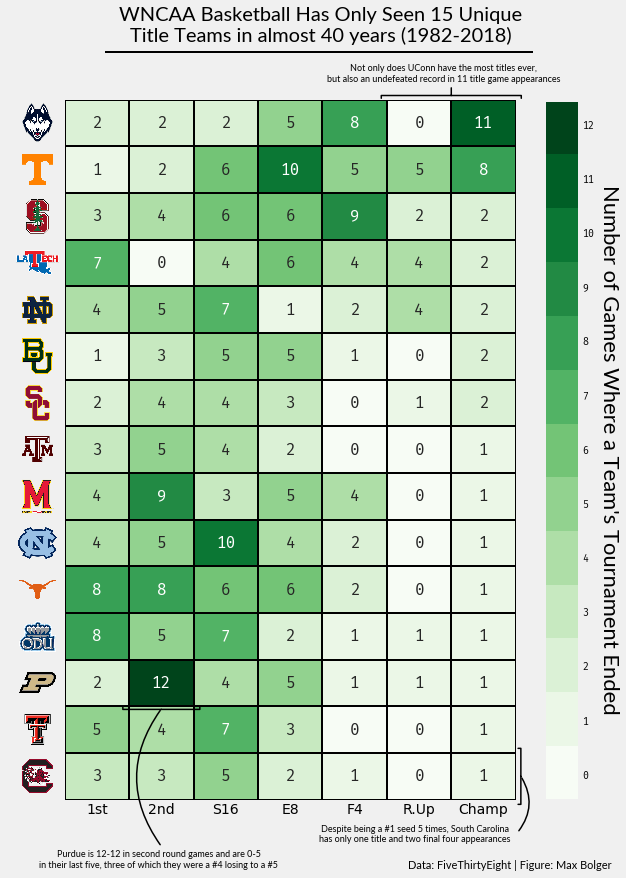

In [ ]:
viz = finishes.sort_values(by='Champ',ascending=False).head(15)

plt.style.use('fivethirtyeight')
cmap = matplotlib.cm.Greens

N = viz.max().max() - viz.min().min() + 1

fig, ax = plt.subplots(figsize=(9,12))
sns.heatmap(viz, cmap=cmap, linewidths=1, linecolor='black',cbar=False,annot=True,annot_kws={"fontproperties":prop,'size':16})
colorbar_index(ncolors=N, cmap=cmap,data=viz)

ax.set_ylabel('')
ax.set_xlabel('')

def getImage(path): 
    return OffsetImage(plt.imread(path),zoom=0.085)

for x0, y0, path in zip([0]*15,np.arange(0.5,15.5,1),paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), xybox=(-.425,y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

plt.figtext(0.475,.885,"WNCAA Basketball Has Only Seen 15 Unique\nTitle Teams in almost 40 years (1982-2018)\n\n\n\n\n\n\n",fontproperties=prop2,fontsize=20,ha='center',va='center')

ax.set(yticklabels=['            '])

trans = ax.get_yaxis_transform()

ax.annotate("",
            xy=(6,-.3), xycoords='data',
            xytext=(6,-.05), textcoords='data',
            annotation_clip=False,
            arrowprops=dict(arrowstyle="]-,widthA=5,lengthA=.2",
                            color="k",
                            lw=1.5
                            ),
            )

ax.annotate("",
            xy=(1.5,13.065), xycoords='data',
            xytext=(1.5,13.064999999999), textcoords='data',
            annotation_clip=False,
            arrowprops=dict(arrowstyle="]-,widthA=2.75,lengthA=.2",
                            color="k",
                            lw=1.5
                            ),
            )

ax.annotate("",
            xy=(1.5,13.053), xycoords='data',
            xytext=(1.5,16), textcoords='data',
            annotation_clip=False,
            arrowprops=dict(arrowstyle="-",
                            color="k",
                            lw=1.5,
                            connectionstyle="arc3,rad=-0.36",
                            ),
            )

ax.annotate("",
            xy=(7.08,14.5), xycoords='data',
            xytext=(7.079999,14.5), textcoords='data',
            annotation_clip=False,
            arrowprops=dict(arrowstyle="]-,widthA=2,lengthA=.2",
                            color="k",
                            lw=1.5,
                            ),
            )

ax.annotate("",
            xy=(7.08,14.5), xycoords='data',
            xytext=(7.03,15.7), textcoords='data',
            annotation_clip=False,
            arrowprops=dict(arrowstyle="-",
                            color="k",
                            lw=1.5,
                            connectionstyle="arc3,rad=0.35",
                            ),
            )

plt.figtext(0.665,.91,
            'Not only does UConn have the most titles ever,\n' \
            'but also an undefeated record in 11 title game appearances',
            fontproperties=prop2,fontsize=9,ha='center',va='center')

plt.figtext(0.225,0,
            "Purdue is 12-12 in second round games and are 0-5\nin their " \
            'last five, three of which they were a #4 losing to a #5',
            fontproperties=prop2,fontsize=9,ha='center',va='center')

plt.figtext(0.62,0.0295,
            "Despite being a #1 seed 5 times, South Carolina\n" \
            'has only one title and two final four appearances',
            fontproperties=prop2,fontsize=9,ha='center',va='center')

plt.figtext(0.61,-.01,"Data: FiveThirtyEight | Figure: Max Bolger",fontproperties=prop2,fontsize=11)

ax2 = fig.add_axes([0.11,.885,0.725,0.1])
ax2.axis("off")
ax2.plot([0,1],[1,1],linewidth=2, color='k')
# plt.savefig('wk7_wncaa_W.png',dpi=300,bbox_inches='tight')

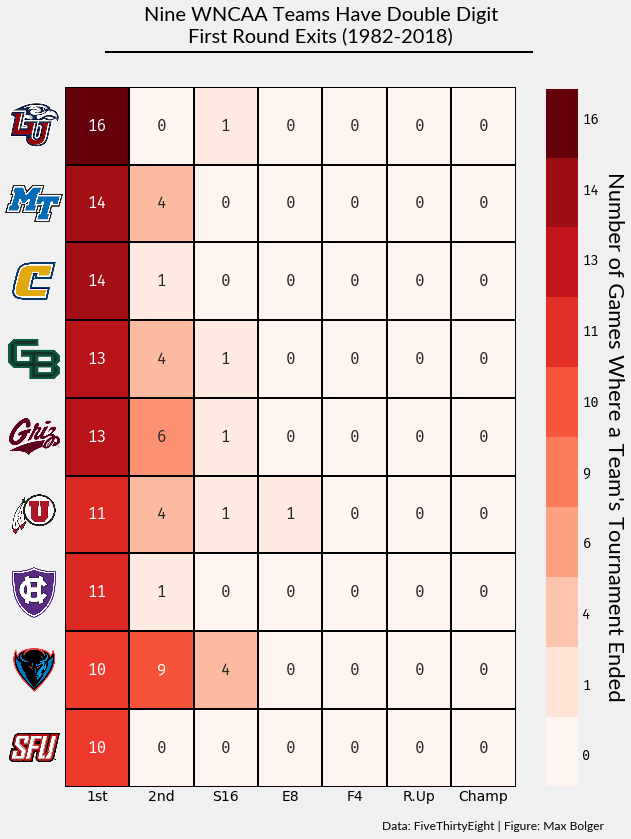

In [90]:
viz = finishes.sort_values(by='1st',ascending=False).head(9)

paths = [f'{i}.png' for i in list(viz.index)]

plt.style.use('fivethirtyeight')
cmap = matplotlib.cm.Reds

N=10

fig, ax = plt.subplots(figsize=(9,12))
 
sns.heatmap(viz, cmap=cmap, linewidths=1, linecolor='black',cbar=False,annot=True,annot_kws={"fontproperties":prop,'size':16})
colorbar_index(ncolors=N, cmap=cmap,data=viz)

ax.set_ylabel('')
ax.set_xlabel('')

def getImage(path): 
    return OffsetImage(plt.imread(path),zoom=0.2)

for x0, y0, path in zip([0]*15,np.arange(0.5,15.5,1),paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), xybox=(-.475,y0), frameon=False, fontsize=4)
    ax.add_artist(ab)

plt.figtext(0.475,.87,"Nine WNCAA Teams Have Double Digit\nFirst Round Exits (1982-2018)\n\n\n\n\n\n\n",fontproperties=prop2,fontsize=20,ha='center',va='center')
ax.set(yticklabels=['            '])

trans = ax.get_yaxis_transform()

plt.figtext(0.57,.02,"Data: FiveThirtyEight | Figure: Max Bolger",fontproperties=prop2,fontsize=12)

ax2 = fig.add_axes([0.11,.87,0.725,0.1])
ax2.axis("off")
ax2.plot([0,1],[1,1],linewidth=2, color='k')
# plt.savefig('wk7_wncaa_L.png',dpi=300,bbox_inches='tight')